# Machine Learning Modeling Using SMOTE and Bootstrapping

In [1]:
%%capture
%matplotlib inline
import pycaret

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from EDA_Optimized import *
from pycaret.classification import *

### Split the data into features and target

In [2]:
X = ds.drop("class", axis=1)
y = ds["class"]

### Instantiate and fit SMOTE

In [3]:
### Instantiating SMOTE
sm = SMOTE(random_state=42)

### Fit SMOTE to training data
X_resampled, y_resampled = sm.fit_resample(X, y)

### Printing class disribution of original and resampled data


In [4]:
print("Class Distribution before Resampleing: ", y.value_counts())

print("\nClass Distribution afer Resampling", y_resampled.value_counts())

Class Distribution before Resampleing:  class
1    123
0     32
Name: count, dtype: int64

Class Distribution afer Resampling class
1    123
0    123
Name: count, dtype: int64


####  Using bootstrapping to further increase dataset size

In [5]:
X_resampled, y_resampled = resample(X_resampled, y_resampled, n_samples=1000, random_state=42)

In [6]:
y_resampled.value_counts()

class
0    506
1    494
Name: count, dtype: int64

In [7]:
X_resampled.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
102,27,0,0,0,1,0,0,1,1,0,0,0,0,2.400000,168.0,227.000000,3.000000,66.000000,1
179,61,0,0,0,1,1,0,1,1,0,0,0,0,1.323133,85.0,58.749163,3.854069,97.185617,0
92,33,0,1,0,0,0,0,2,2,0,0,0,0,1.000000,85.0,60.000000,4.000000,100.000000,1
14,47,0,0,1,0,0,0,1,0,0,0,0,0,1.000000,85.0,60.000000,4.000000,100.000000,0
106,35,0,0,0,1,0,0,2,2,1,1,1,0,1.500000,138.0,58.000000,2.600000,100.000000,1


### Combine resampled features and target into a DataFrame

In [8]:
train_data = pd.concat([X_resampled, y_resampled], axis=1)

### Initialize PyCaret setup

In [9]:
s = setup(data=train_data, target='class', session_id=123, normalize=True, index=False)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(5254, 20)"
4,Transformed data shape,"(5254, 20)"
5,Transformed train set shape,"(3677, 20)"
6,Transformed test set shape,"(1577, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0620
dt,Decision Tree Classifier,0.9997,0.9997,0.9994,1.0000,0.9997,0.9995,0.9995,0.0090
et,Extra Trees Classifier,0.9997,1.0000,0.9994,1.0000,0.9997,0.9995,0.9995,0.0540
lightgbm,Light Gradient Boosting Machine,0.9995,1.0000,1.0000,0.9989,0.9994,0.9989,0.9989,1.0520
knn,K Neighbors Classifier,0.9967,0.9997,0.9942,0.9989,0.9965,0.9934,0.9935,0.0190
gbc,Gradient Boosting Classifier,0.9967,1.0000,0.9977,0.9954,0.9965,0.9935,0.9935,0.0980
ada,Ada Boost Classifier,0.9883,0.9991,0.9884,0.9868,0.9876,0.9765,0.9766,0.0410
lr,Logistic Regression,0.9301,0.9720,0.9000,0.9492,0.9237,0.8593,0.8607,0.3040
svm,SVM - Linear Kernel,0.9168,0.9634,0.8936,0.9275,0.9099,0.8326,0.8337,0.0120
ridge,Ridge Classifier,0.8972,0.9594,0.8202,0.9552,0.8819,0.7920,0.7999,0.0090


In [11]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## Evaluate the best model

In [12]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Plot various aspects of the best model

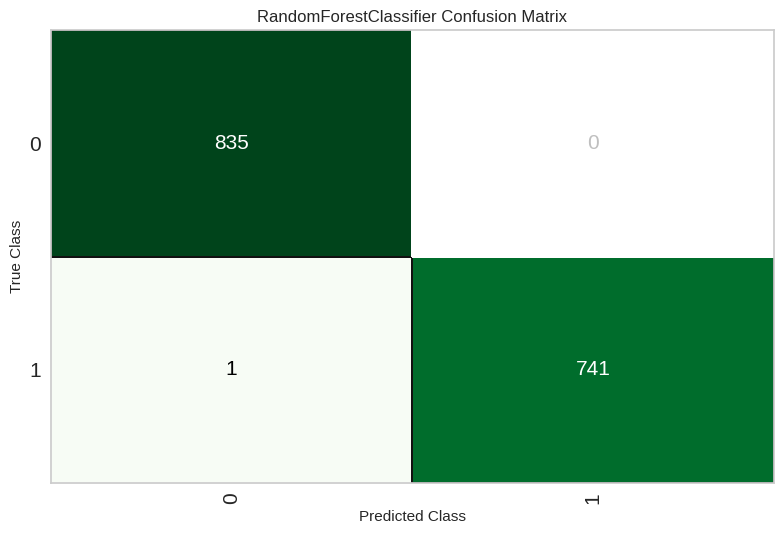

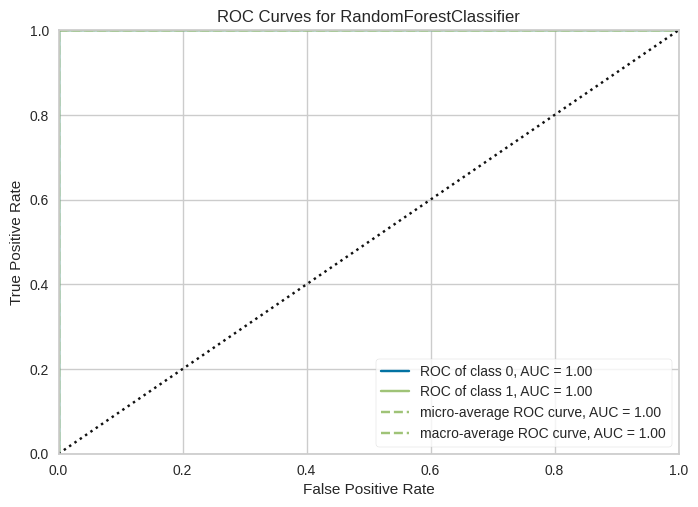

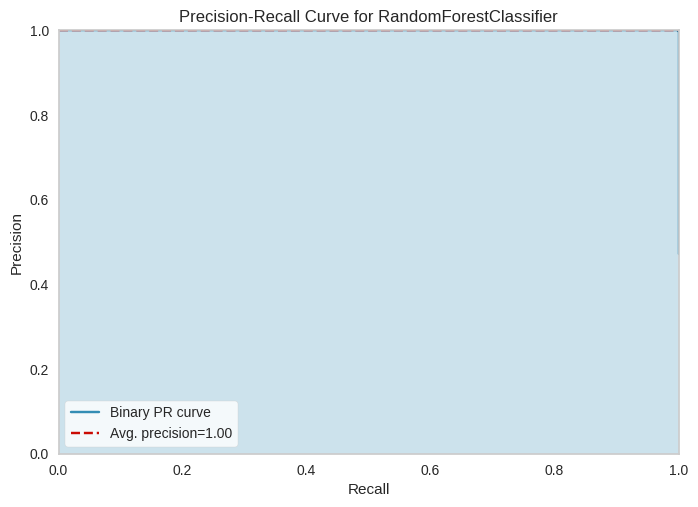

In [13]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
plot_model(best_model, plot='pr')
# plot_model(best_model, plot='feature')

### Making Predictions

In [14]:
predictions = predict_model(best_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9994,1.0000,0.9987,1.0000,0.9993,0.9987,0.9987


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score
3677,48,0,0,0,1,1,0,1,1,0,...,1,4.80000,123.000000,157.000000,2.700000,31.000000,1,0,0,1.00
3678,34,0,0,0,2,2,2,2,2,2,...,2,1.00000,85.000000,20.000000,4.000000,100.000000,0,1,1,0.93
3679,41,0,0,0,1,1,0,1,1,0,...,0,1.84166,239.807144,74.025314,3.376917,36.826881,0,0,0,1.00
3680,34,0,1,0,0,0,0,1,0,0,...,0,1.00000,85.000000,86.000000,4.000000,100.000000,0,1,1,1.00
3681,57,0,0,0,1,1,0,1,0,0,...,0,4.60000,82.000000,55.000000,3.300000,30.000000,1,0,0,1.00


### Displaying the probability of both classes


In [15]:
predictions_prob = predict_model(best_model, raw_score=True)
predictions_prob.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9994,1.0000,0.9987,1.0000,0.9993,0.9987,0.9987


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score_0,prediction_score_1
3677,48,0,0,0,1,1,0,1,1,0,...,4.80000,123.000000,157.000000,2.700000,31.000000,1,0,0,1.00,0.00
3678,34,0,0,0,2,2,2,2,2,2,...,1.00000,85.000000,20.000000,4.000000,100.000000,0,1,1,0.07,0.93
3679,41,0,0,0,1,1,0,1,1,0,...,1.84166,239.807144,74.025314,3.376917,36.826881,0,0,0,1.00,0.00
3680,34,0,1,0,0,0,0,1,0,0,...,1.00000,85.000000,86.000000,4.000000,100.000000,0,1,1,0.00,1.00
3681,57,0,0,0,1,1,0,1,0,0,...,4.60000,82.000000,55.000000,3.300000,30.000000,1,0,0,1.00,0.00


# Save the best model


In [16]:
save_model(best_model, "smote_bootstrap_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'steroid',
                                              'antivirals', 'fatigue', 'malaise',
                                              'anorexia', 'liver_big',
                                              'liver_firm', 'spleen_palpable',
                                              'spiders', 'ascites', 'varices',
                                              'bilirubin', 'alk_phosphate',
                                              'sgot', 'albumin', 'protime',
                                              'histology'],
                                     transformer=SimpleImputer(add_indica...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_dept